In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from google.colab import data_table

In [151]:
#read in the cvs data file
crime = pd.read_csv('/content/Crimes_-_2001_to_Present_20240219.csv')

In [152]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000751 entries, 0 to 8000750
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [8]:
crime.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,448865.0,1.080873e+07,3.460316e+06,637.000000,1.205836e+07,1.234455e+07,1.319332e+07,1.337230e+07
Beat,448864.0,1.168930e+03,7.064329e+02,111.000000,6.120000e+02,1.033000e+03,1.724000e+03,2.535000e+03
District,448863.0,1.132943e+01,7.032420e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,448651.0,2.295976e+01,1.389711e+01,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,448654.0,3.705146e+01,2.164463e+01,0.000000,2.300000e+01,3.200000e+01,5.600000e+01,7.700000e+01
X Coordinate,436257.0,1.164812e+06,1.928952e+04,0.000000,1.153268e+06,1.166526e+06,1.176660e+06,1.205119e+06
Y Coordinate,436257.0,1.886045e+06,3.588608e+04,0.000000,1.858727e+06,1.891393e+06,1.909876e+06,1.951503e+06
Year,448864.0,2.017838e+03,6.960029e+00,2001.000000,2.020000e+03,2.021000e+03,2.023000e+03,2.024000e+03
Latitude,436257.0,4.184289e+01,9.883761e-02,36.619446,4.176774e+01,4.185753e+01,4.190843e+01,4.202255e+01
Longitude,436257.0,-8.767069e+01,6.920498e-02,-91.686566,-8.771262e+01,-8.766436e+01,-8.762744e+01,-8.752453e+01


In [9]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111.0,1.0,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515.0,25.0,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824.0,8.0,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724.0,17.0,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222.0,22.0,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [142]:
#Number of crimes by crime type
count_by_type = crime.groupby(['Primary Type']).size().reset_index(name='Count_by_Type')
count_by_type.sort_values(by='Count_by_Type', ascending = False)

,Primary Type,Count_by_Type
31,THEFT,89592
2,BATTERY,80860
6,CRIMINAL DAMAGE,52375
1,ASSAULT,36892
9,DECEPTIVE PRACTICE,35476
17,MOTOR VEHICLE THEFT,28611
23,OTHER OFFENSE,28375
18,NARCOTICS,20049
28,ROBBERY,18054
3,BURGLARY,17031


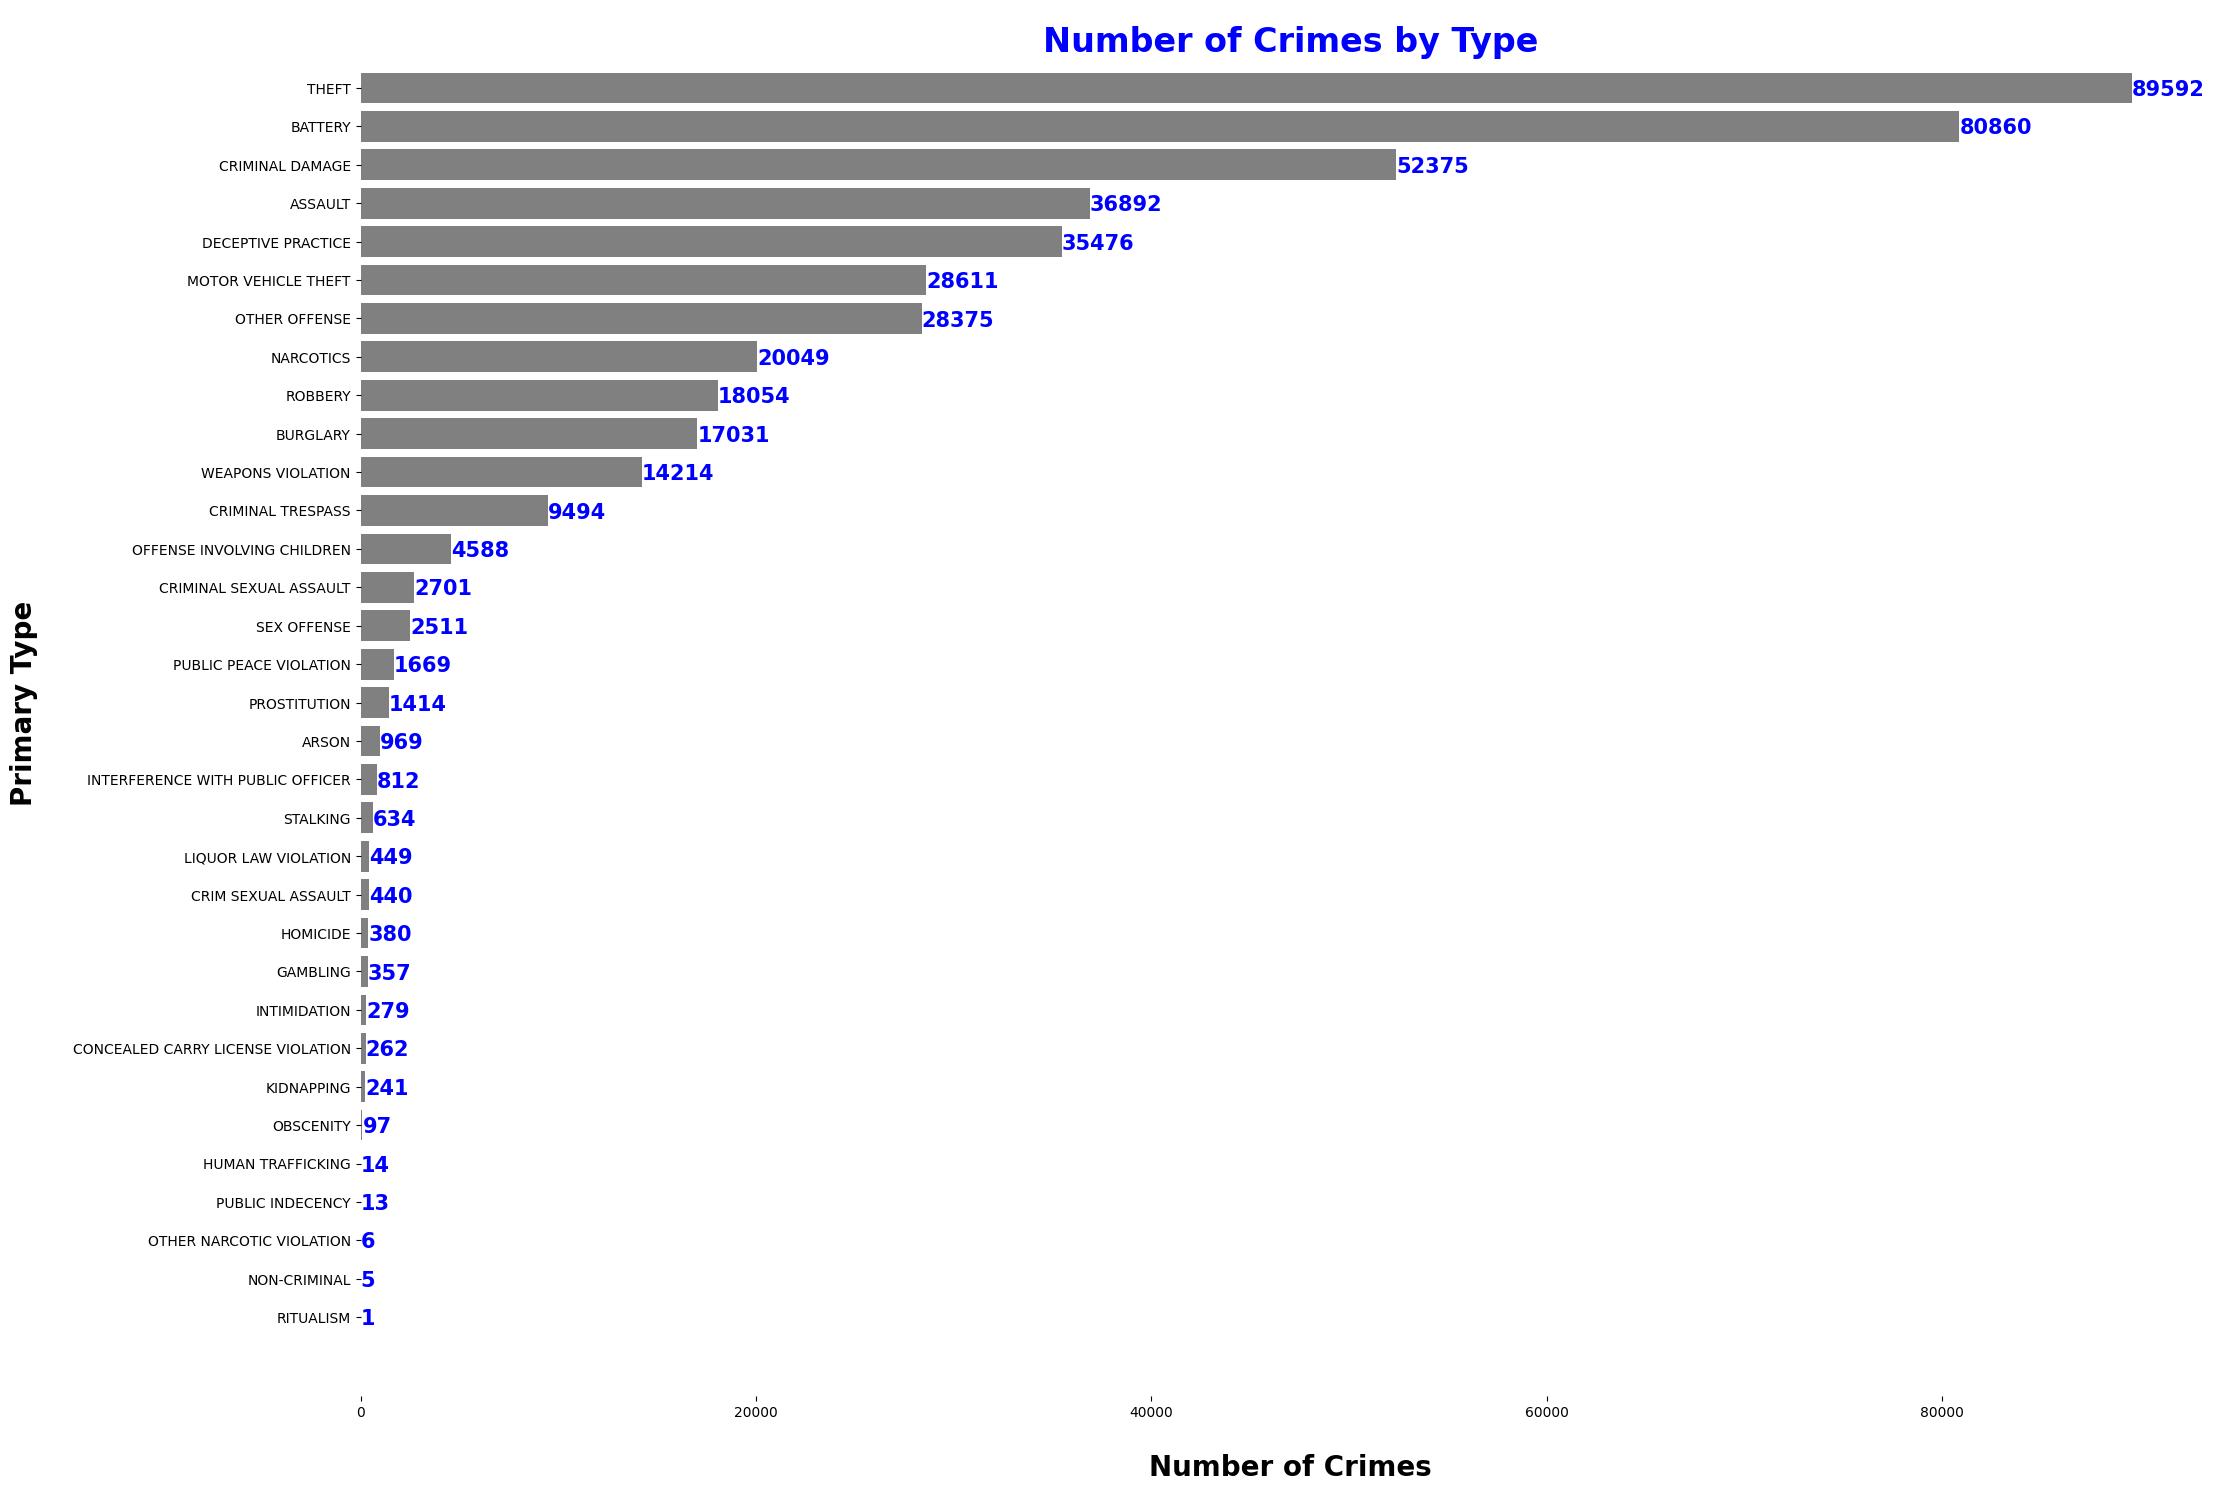

In [143]:
fig, ax = plt.subplots(figsize = (24,18))
count_by_type = count_by_type.sort_values(by = 'Count_by_Type', ascending = True)
bars = ax.barh(count_by_type['Primary Type'], count_by_type['Count_by_Type'], color = 'grey')

ax.set_xlabel('Number of Crimes', fontsize = 20, fontweight = 'bold', labelpad = 25)
ax.set_ylabel('Primary Type', fontsize = 20, fontweight = 'bold', labelpad = 25)
ax.set_title('Number of Crimes by Type', fontsize = 24, fontweight = 'bold', color = 'blue', x=0.5, y=0.97)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

for i in ax.patches:
    plt.text(i.get_width()+0.8, i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize = 15, fontweight ='bold',
             color ='blue')


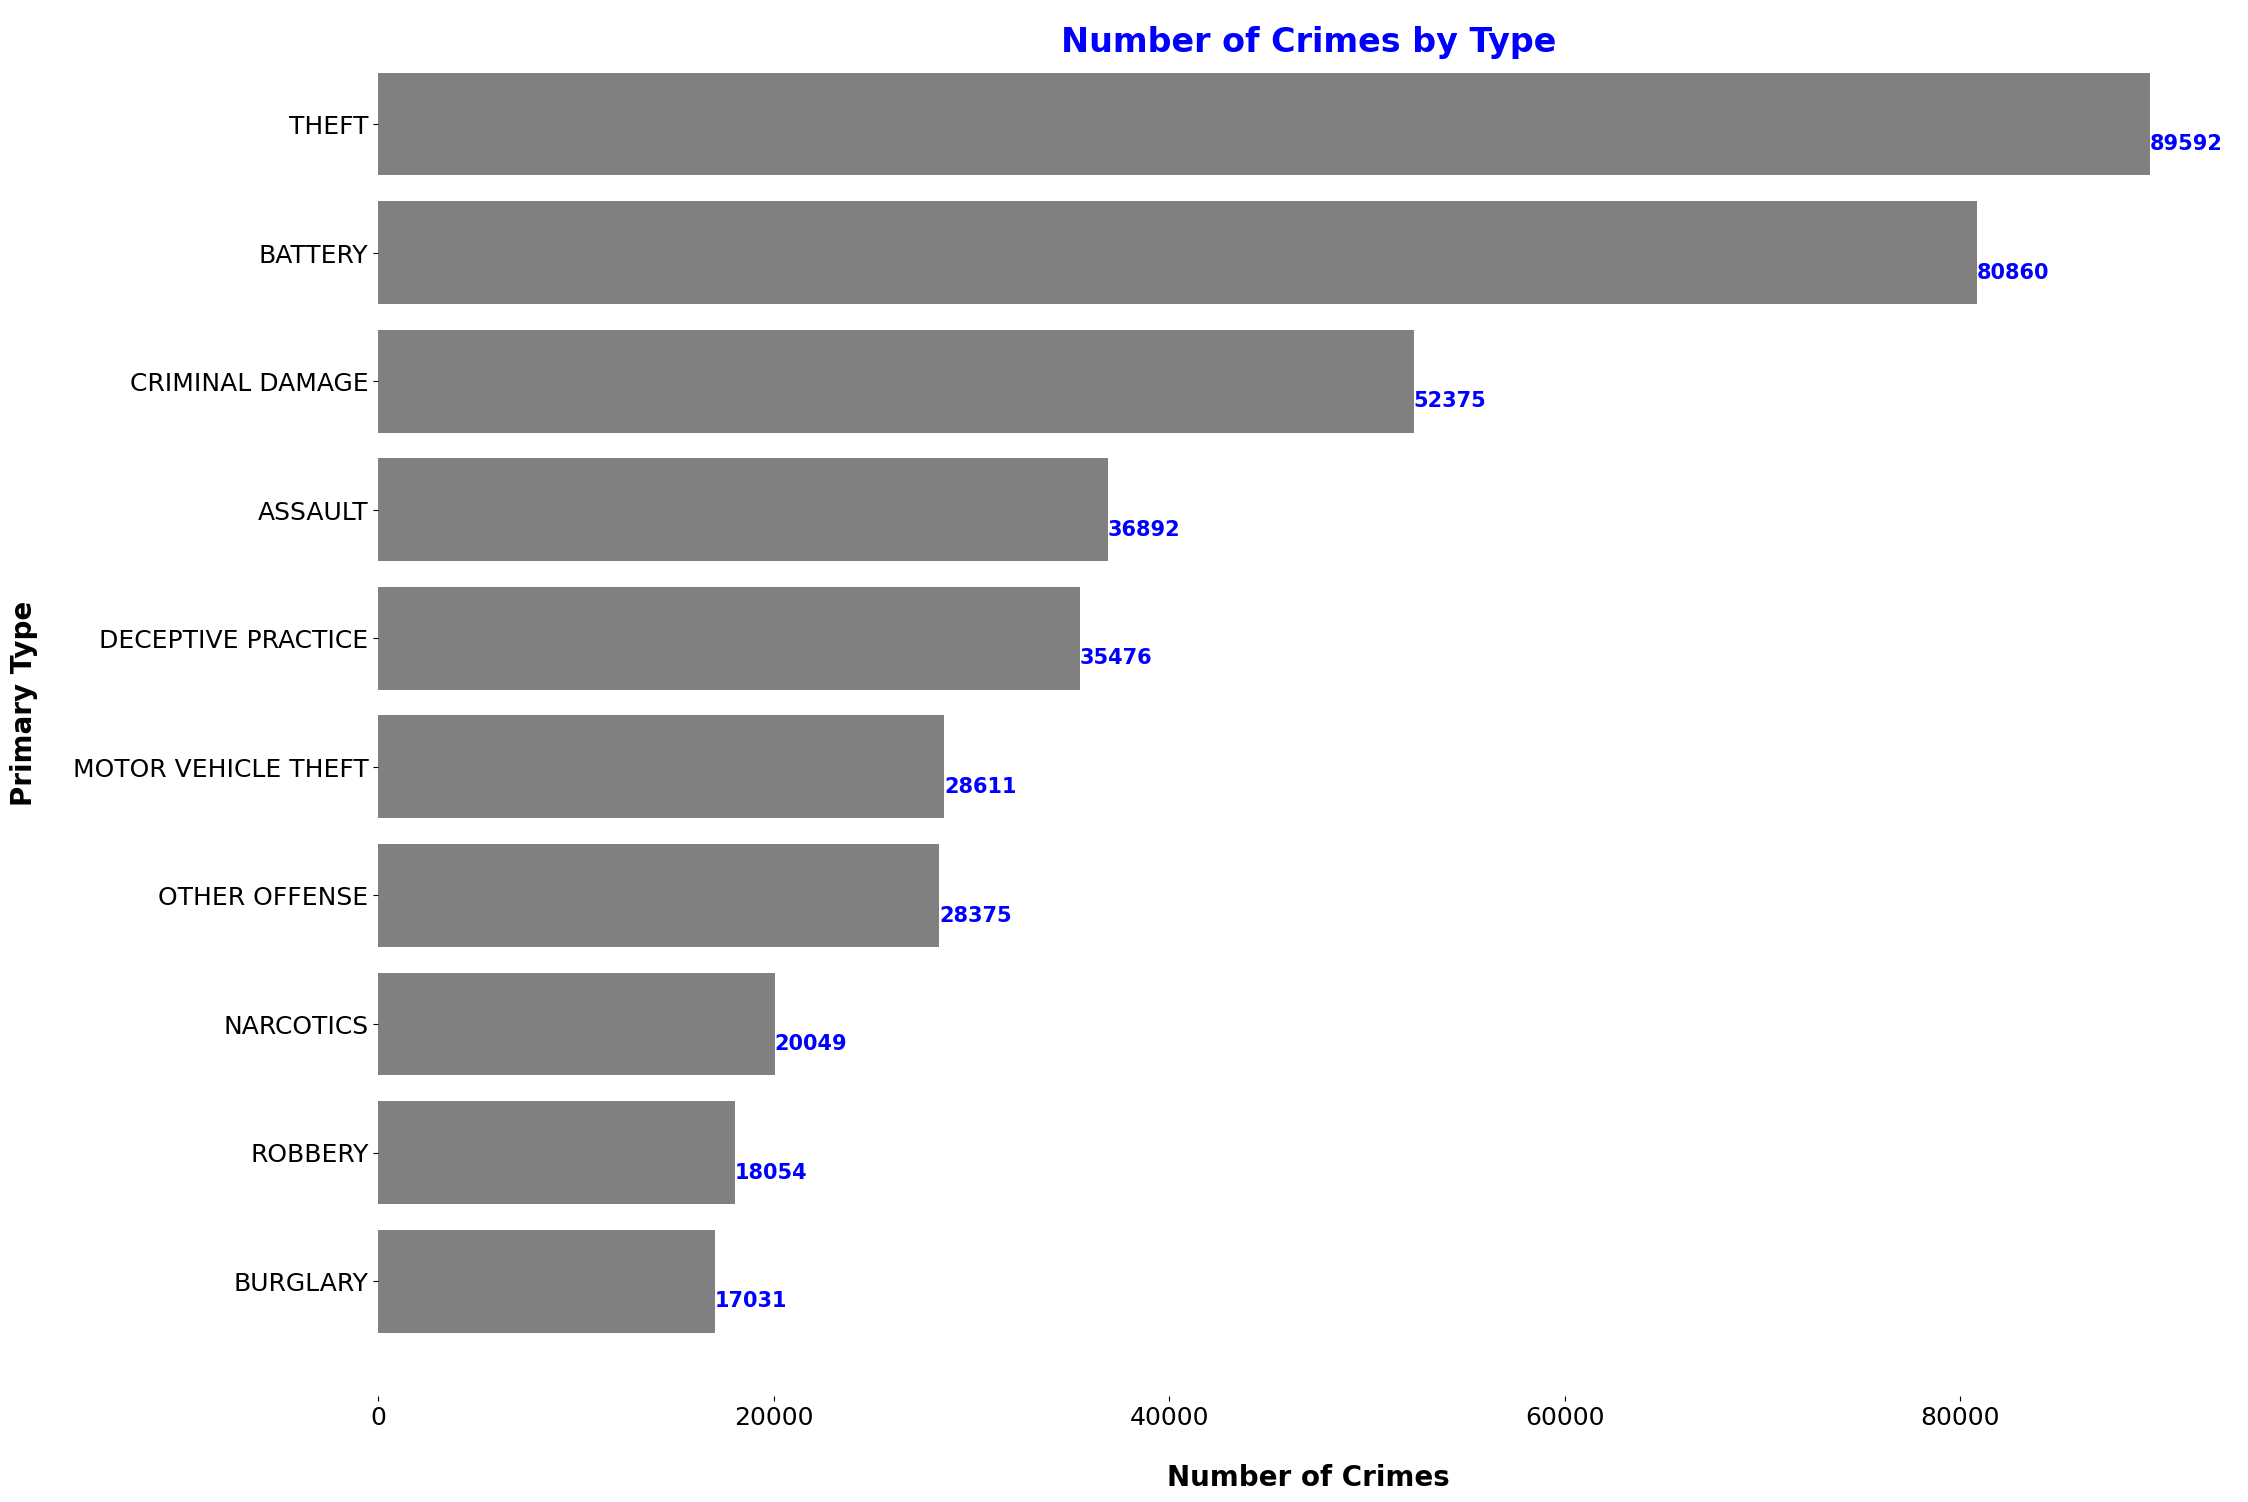

In [148]:
#Display only top 10 type of crimes
fig, ax = plt.subplots(figsize = (24,18))
top_ten_type = count_by_type.sort_values(by = 'Count_by_Type', ascending = True).head(10)
bars = ax.barh(top_ten_type['Primary Type'], top_ten_type['Count_by_Type'], color = 'grey')

ax.set_xlabel('Number of Crimes', fontsize = 20, fontweight = 'bold', labelpad = 25)
ax.set_ylabel('Primary Type', fontsize = 20, fontweight = 'bold', labelpad = 25)
ax.set_title('Number of Crimes by Type', fontsize = 24, fontweight = 'bold', color = 'blue', x=0.5, y=0.97)

ax.tick_params(axis='both', labelsize=18)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

for i in ax.patches:
    plt.text(i.get_width()+0.8, i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize = 15, fontweight ='bold',
             color ='blue')

In [153]:
#Number of Crimes by Year
count_by_year = crime.groupby('Year').size().reset_index(name = 'Count_by_Year')
count_by_year.sort_values(by='Count_by_Year', ascending = False)

,Year,Count_by_Year
1,2002,486815
0,2001,485904
2,2003,475987
3,2004,469428
4,2005,453777
5,2006,448185
6,2007,437090
7,2008,427195
8,2009,392835
9,2010,370527


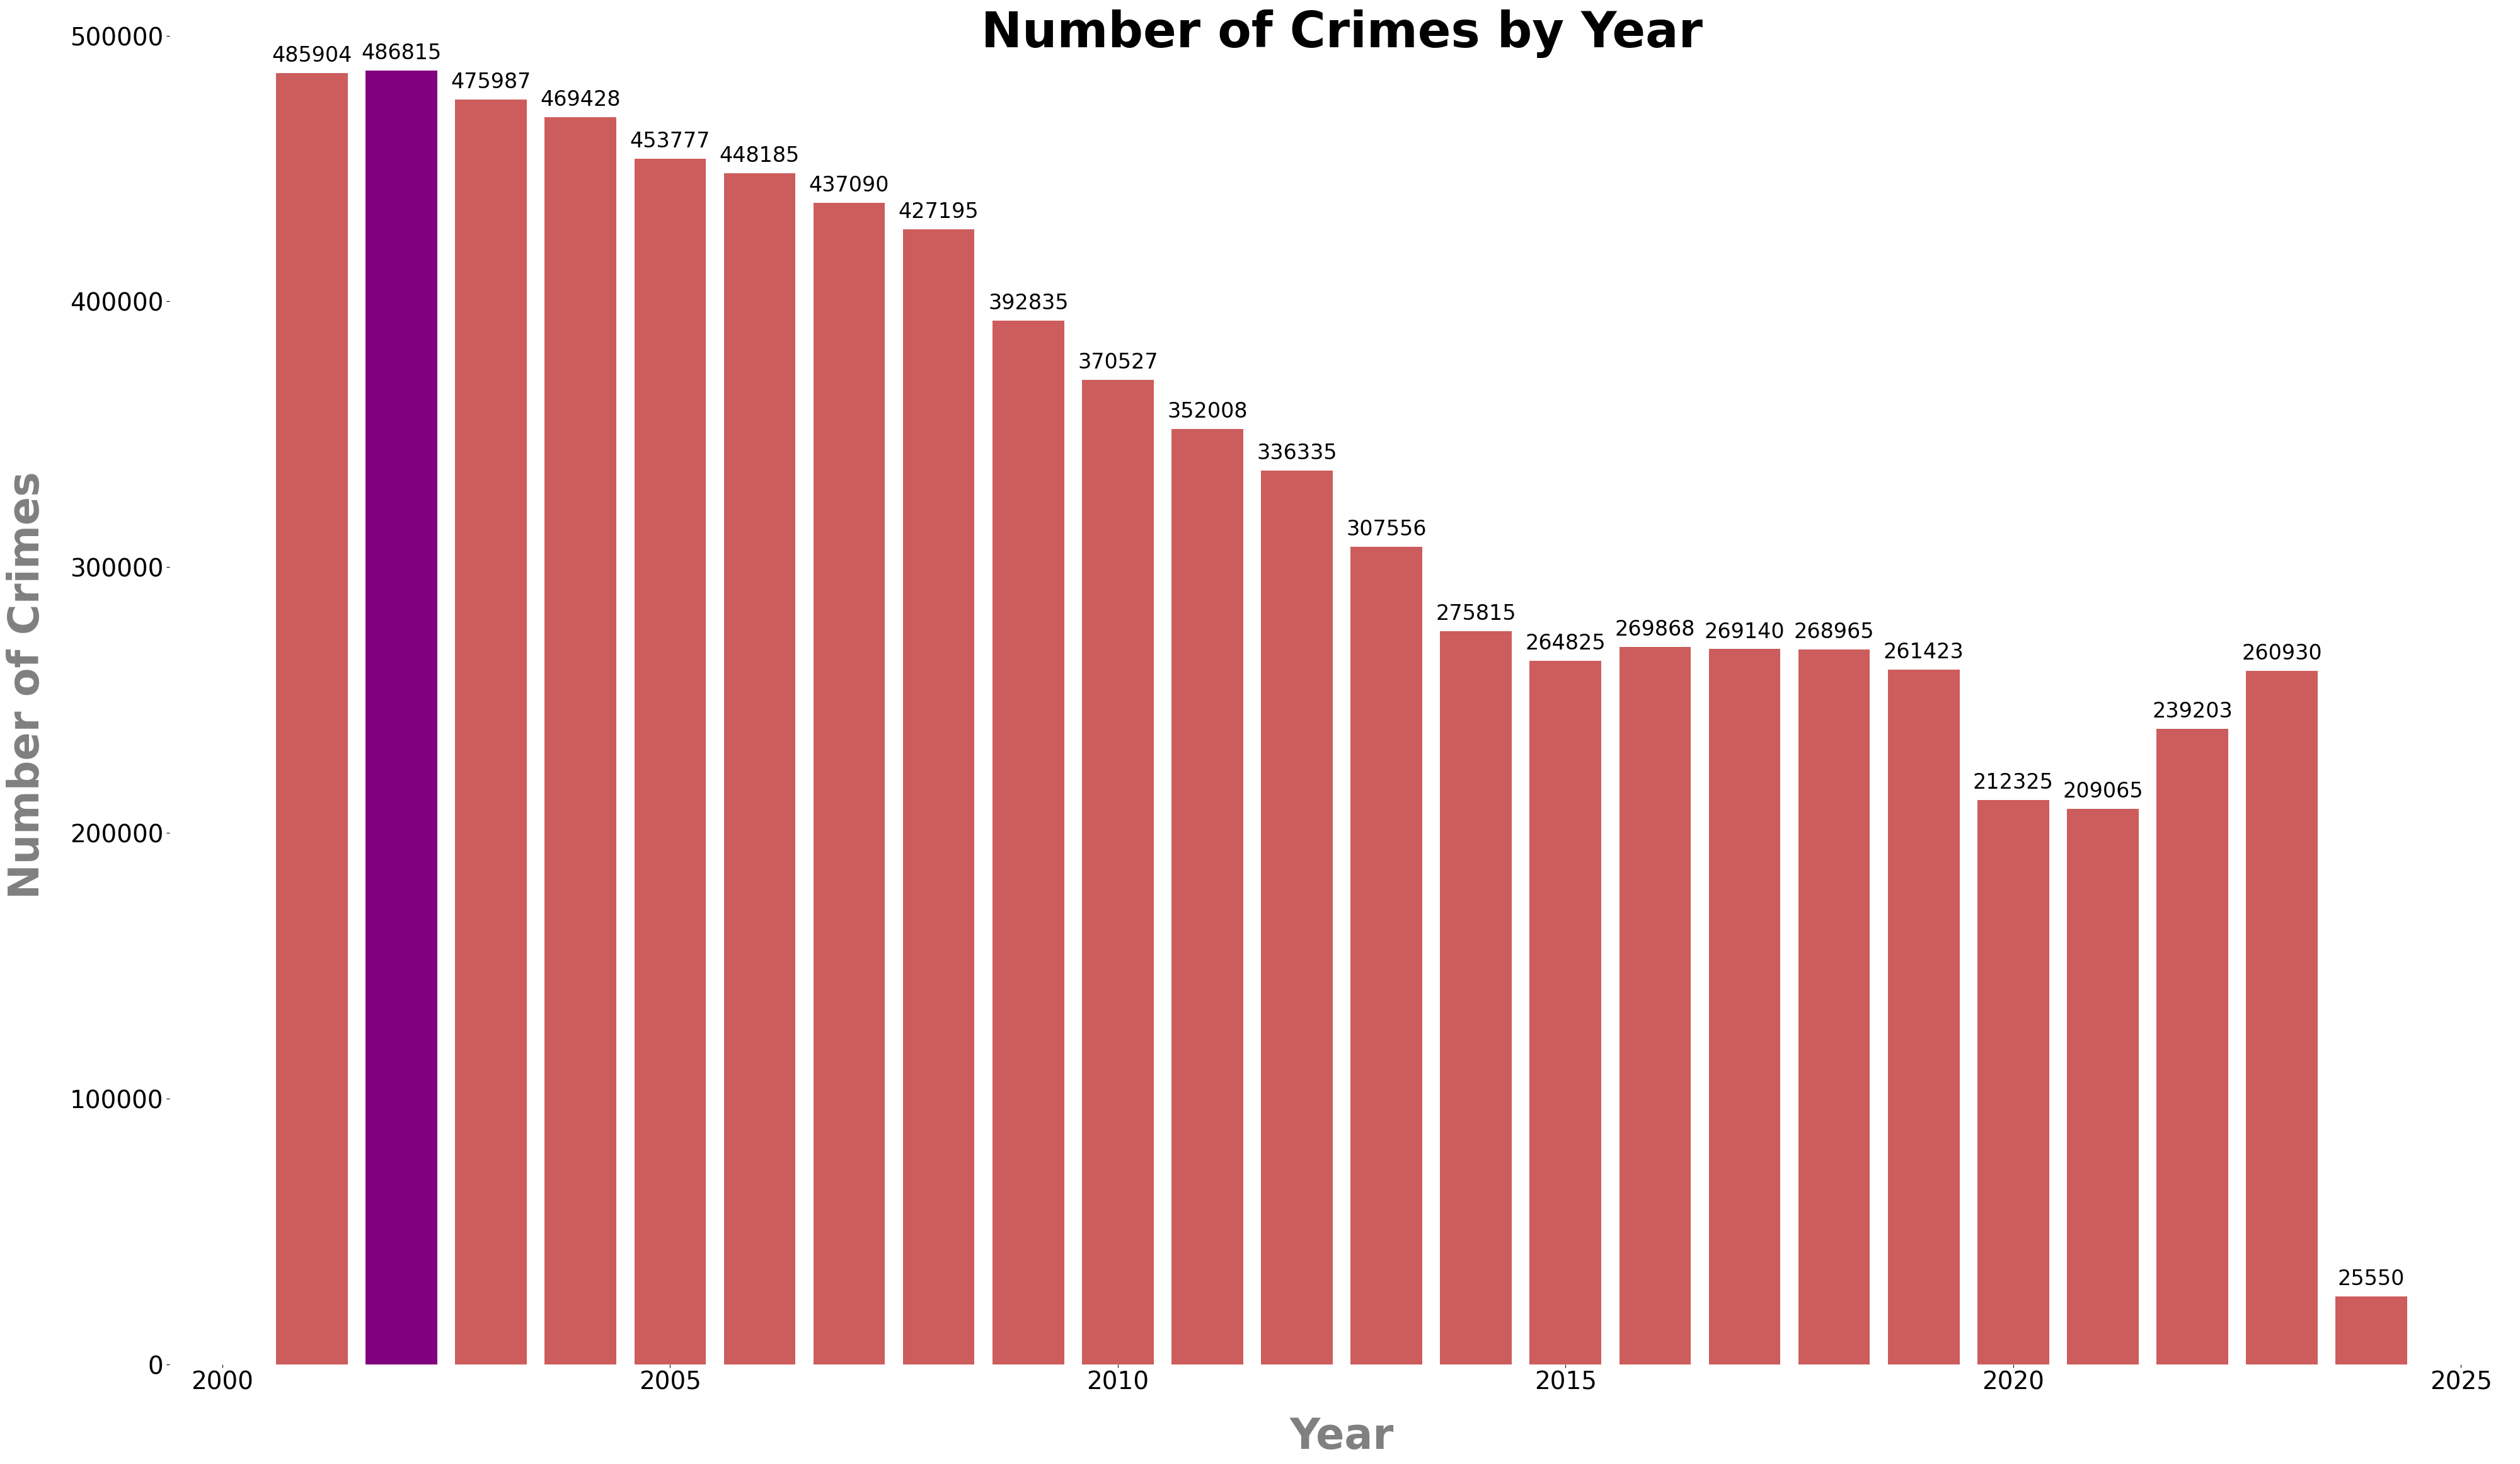

In [247]:
fig, ax= plt.subplots(figsize = (48,28))
count_by_year = count_by_year.sort_values(by = 'Year', ascending = True)

colors = ['purple' if (bar == max(count_by_year['Count_by_Year'])) else 'indianred' for bar in count_by_year['Count_by_Year']]

plt.bar(count_by_year['Year'], count_by_year['Count_by_Year'], color =colors,
        width = 0.8)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Number of Crimes', fontsize = 48, fontweight = 'bold', color = 'gray', labelpad = 25)
ax.set_xlabel('Year', fontsize = 48, fontweight = 'bold', color = 'gray', labelpad = 25)
ax.set_title('Number of Crimes by Year', fontsize = 56, fontweight = 'bold', x=0.5, y=0.97)

ax.tick_params(axis='both', labelsize=28)

for i in ax.patches:
    plt.annotate(format(i.get_height(), '.0f'),
                   (i.get_x() + i.get_width() / 2,
                    i.get_height()), ha='center', va='center',
                    size=24, xytext=(0, 20),
                    textcoords='offset points')


In [275]:
#Number of Crimes by Location
count_by_location = crime.groupby('Location Description').size().reset_index(name = 'Count_by_Location')
count_by_location = count_by_location.sort_values(by='Count_by_Location', ascending = False)
data_table.DataTable(count_by_location, include_index=False, num_rows_per_page=15)

,Location Description,Count_by_Location
189,STREET,2089624
160,RESIDENCE,1331949
17,APARTMENT,919612
184,SIDEWALK,739961
140,OTHER,270015
148,PARKING LOT/GARAGE(NON.RESID.),202969
15,ALLEY,177935
185,SMALL RETAIL STORE,153416
181,"SCHOOL, PUBLIC, BUILDING",146375
165,RESIDENCE-GARAGE,135525


In [212]:
#Crime Type by Location - Highest to Lowest
type_by_loc = crime.groupby(['Primary Type', 'Location Description']).size().reset_index(name = 'Count_by_Location')
type_by_loc = type_by_loc.sort_values(by='Count_by_Location', ascending = False)
data_table.DataTable(type_by_loc, include_index=False, num_rows_per_page=15)

,Primary Type,Location Description,Count_by_Location
3042,THEFT,STREET,457150
778,CRIMINAL DAMAGE,STREET,329311
258,BATTERY,APARTMENT,311175
1786,MOTOR VEHICLE THEFT,STREET,310443
343,BATTERY,RESIDENCE,299363
...,...,...,...
1946,NON-CRIMINAL,AIRPORT PARKING LOT,1
2592,ROBBERY,BOAT / WATERCRAFT,1
1949,NON-CRIMINAL,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,1
2889,STALKING,PAWN SHOP,1


In [253]:
#Crime Type by Year - Highest to Lowest
type_by_year = crime.groupby(['Primary Type', 'Year']).size().reset_index(name = 'Count')
type_by_year = type_by_year.sort_values(by = 'Count', ascending = False)
data_table.DataTable(type_by_year, include_index=False, num_rows_per_page=15)

,Primary Type,Year,Count
700,THEFT,2001,99280
702,THEFT,2003,98876
701,THEFT,2002,98334
703,THEFT,2004,95464
49,BATTERY,2002,94153
...,...,...,...
96,CONCEALED CARRY LICENSE VIOLATION,2001,1
224,DOMESTIC VIOLENCE,2001,1
595,PUBLIC INDECENCY,2024,1
626,RITUALISM,2007,1


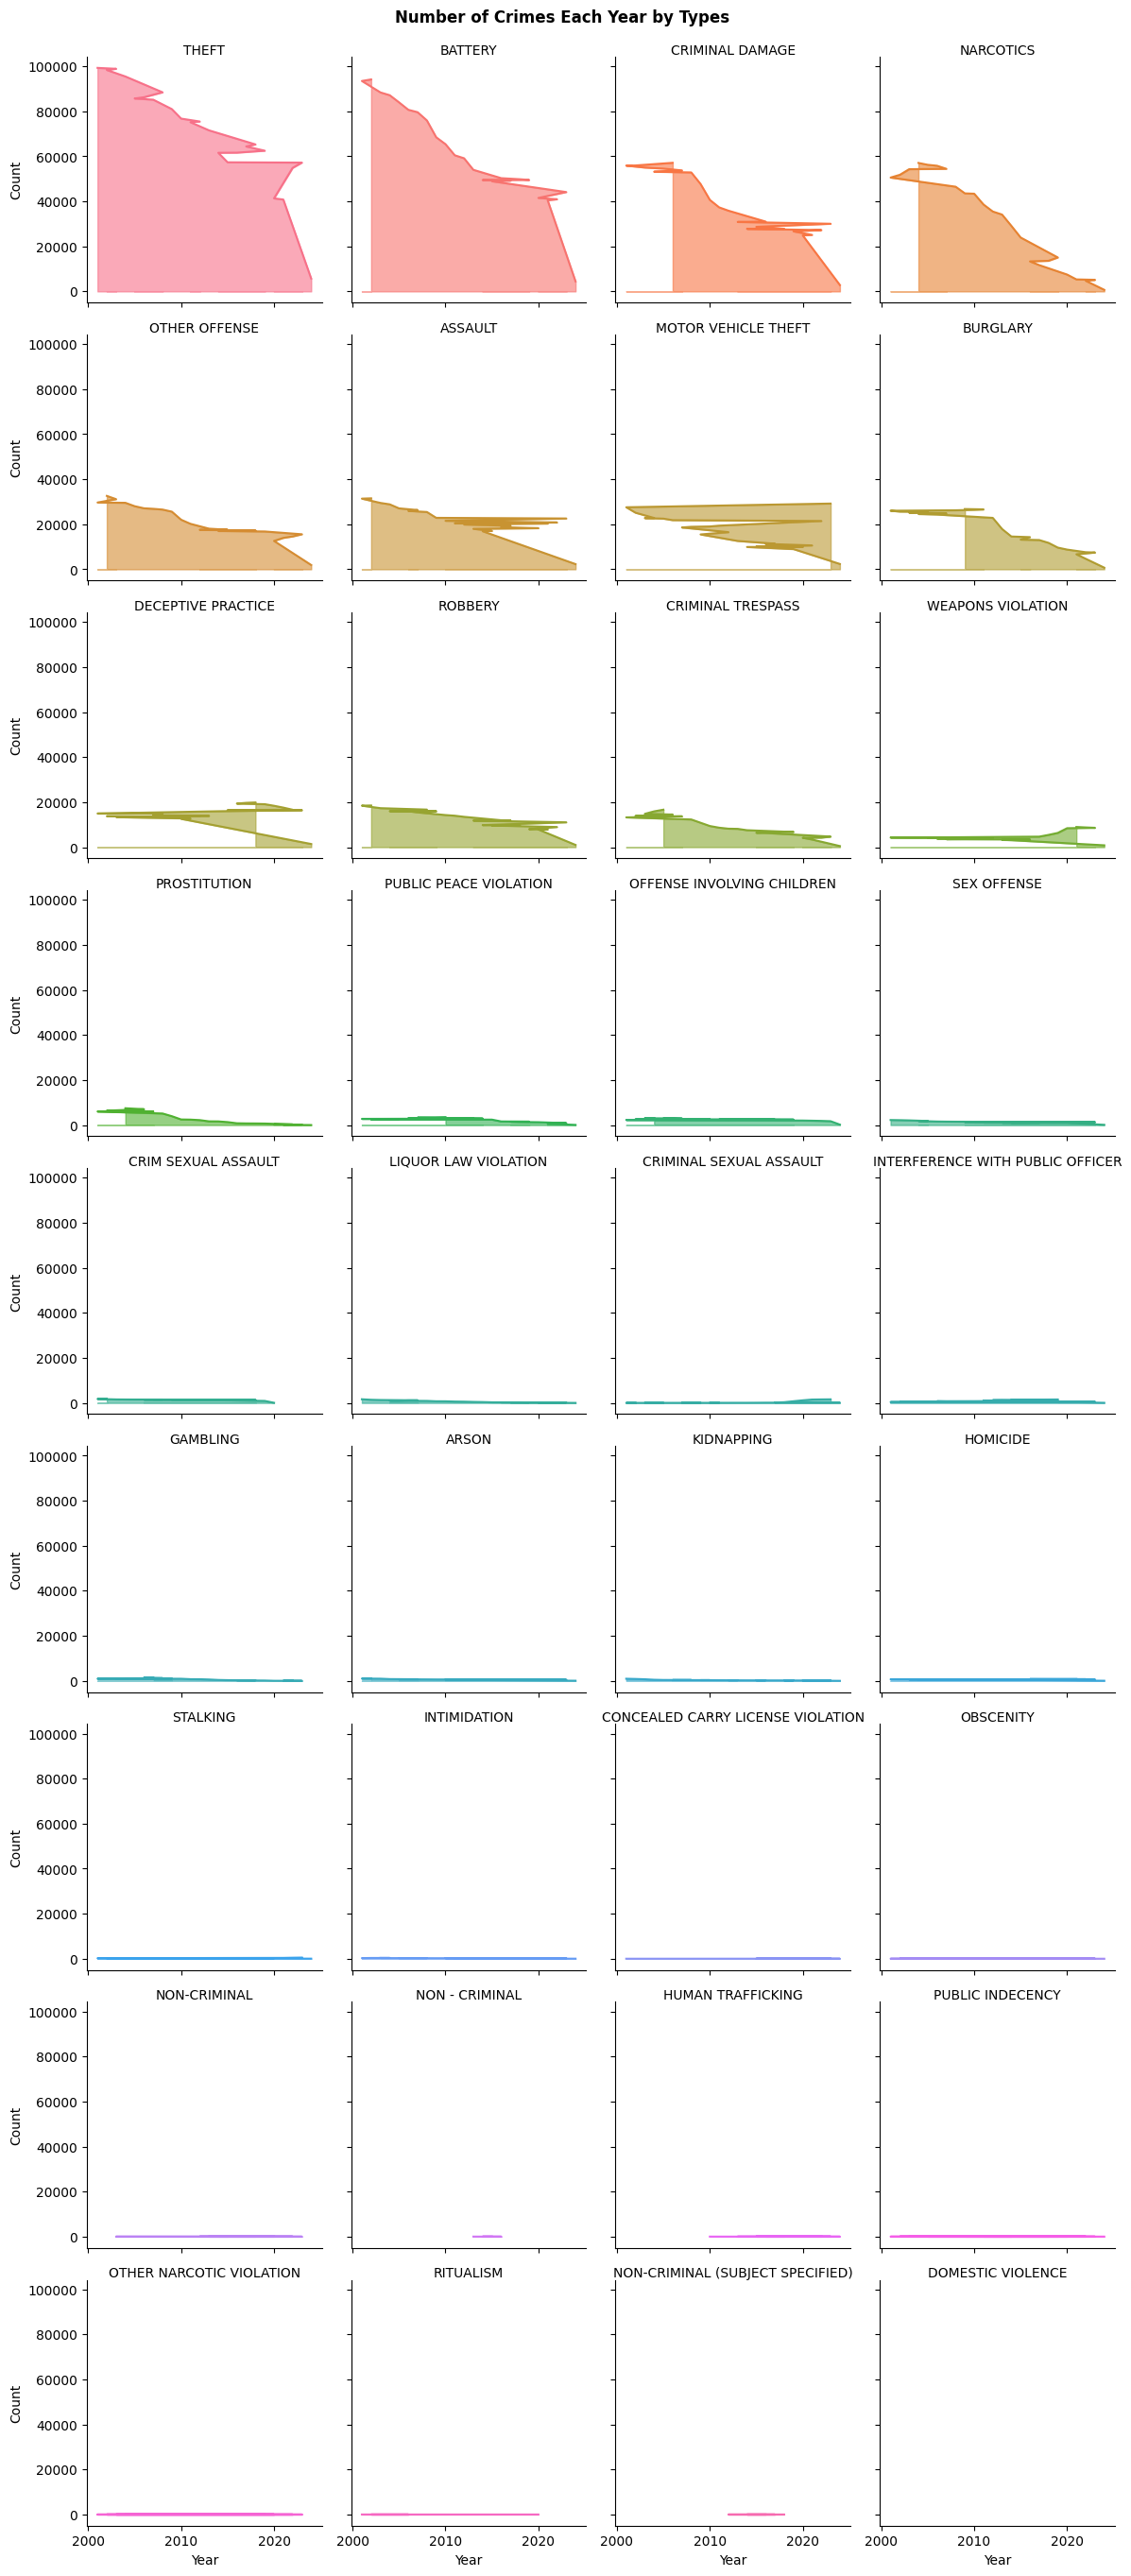

In [270]:
grid = sns.FacetGrid(type_by_year, col='Primary Type', hue='Primary Type', col_wrap=4)
grid = grid.map(plt.plot, 'Year', 'Count')
grid = grid.map(plt.fill_between, 'Year', 'Count', alpha=0.6).set_titles("{col_name}")
grid = grid.fig.suptitle('Number of Crimes Each Year by Types', x=0.5, y=1.008, fontweight = 'bold')

In [215]:
#Number of Arrests Made per Year
arrest_by_year = crime.groupby(['Arrest', 'Year']).size().reset_index(name='Count')
arrest_by_year = arrest_by_year.query('Arrest == True')[['Year', 'Count']]
arrest_by_year

,Year,Count
24,2001,141937
25,2002,141569
26,2003,141595
27,2004,144704
28,2005,140926
29,2006,135422
30,2007,131879
31,2008,110026
32,2009,110834
33,2010,100551


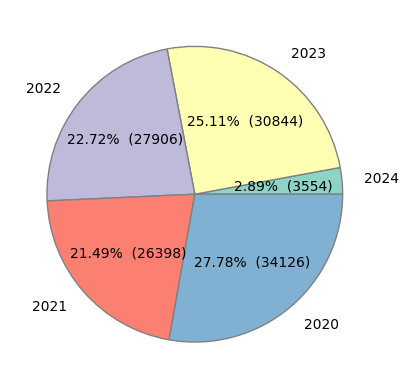

In [242]:
recent_five_year = arrest_by_year.sort_values(by='Year', ascending = False)
recent_five_year = recent_five_year[:5]

def autopct_f(values):
    def percentage(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return percentage

plt.pie(recent_five_year['Count'],labels = recent_five_year['Year'], autopct = autopct_f(recent_five_year['Count']), colors=sns.color_palette('Set3'), labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'gray' })

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

In [242]:
#Arrests Made Each Year per Crime Type
arrest_year_type = crime.groupby(['Arrest', 'Year', 'Primary Type']).size().reset_index(name = 'Count')
arrest_year_type = arrest_year_type.query('Arrest == True')[['Year', 'Primary Type', 'Count']]
arrest_year_type
data_table.DataTable(arrest_year_type, include_index=False, num_rows_per_page=15)

,Year,Primary Type,Count
698,2001,ARSON,181
699,2001,ASSAULT,7150
700,2001,BATTERY,20464
701,2001,BURGLARY,1695
702,2001,CONCEALED CARRY LICENSE VIOLATION,1
...,...,...,...
1415,2024,ROBBERY,33
1416,2024,SEX OFFENSE,6
1417,2024,STALKING,3
1418,2024,THEFT,371


In [243]:
#Crime Type of Which the Most Arrests Made Every Year
highest_each_year = arrest_year_type.loc[arrest_year_type.groupby('Year')['Count'].idxmax()]
highest_each_year[['Year', 'Primary Type', 'Count']]

,Year,Primary Type,Count
716,2001,NARCOTICS,50559
746,2002,NARCOTICS,51781
776,2003,NARCOTICS,54283
805,2004,NARCOTICS,57034
834,2005,NARCOTICS,56121
863,2006,NARCOTICS,55236
893,2007,NARCOTICS,53251
922,2008,NARCOTICS,45482
951,2009,NARCOTICS,43214
980,2010,NARCOTICS,43299


In [245]:
#Arrest by FBI code
arrest_by_FBICode = crime.groupby(['Arrest', 'Year', 'FBI Code']).size().reset_index(name = 'Count')
arrest_by_FBICode = arrest_by_FBICode.query('Arrest==True').sort_values(by='Count', ascending = False)[['Year', 'FBI Code', 'Count']]
data_table.DataTable(arrest_by_FBICode, include_index=False, num_rows_per_page=15)

,Year,FBI Code,Count
693,2004,18,52784
719,2005,18,51890
745,2006,18,51091
667,2003,18,50252
770,2007,18,49334
...,...,...,...
674,2004,01B,1
1165,2023,01B,1
1059,2018,27,1
1190,2024,02,1


In [246]:
#Most arrests by FBI code every year
highest_by_FBICode = arrest_by_FBICode.loc[arrest_by_FBICode.groupby('Year')['Count'].idxmax()]
highest_by_FBICode

,Year,FBI Code,Count
616,2001,18,47011
641,2002,18,47908
667,2003,18,50252
693,2004,18,52784
719,2005,18,51890
745,2006,18,51091
770,2007,18,49334
795,2008,18,42576
820,2009,18,40458
845,2010,18,41017


In [193]:
#Crime type by community
crime['Community_Area_New'] = pd.to_numeric(crime['Community Area'])
crime['Community_Area_New'] = crime['Community_Area_New'].astype("Int64")
type_by_community = crime.groupby(['Community_Area_New', 'Primary Type']).size().reset_index(name = 'Count')
data_table.DataTable(type_by_community, include_index=False, num_rows_per_page=15)

,Community_Area_New,Primary Type,Count
0,0,ASSAULT,3
1,0,BATTERY,13
2,0,CRIM SEXUAL ASSAULT,1
3,0,CRIMINAL DAMAGE,12
4,0,CRIMINAL TRESPASS,3
...,...,...,...
2410,77,ROBBERY,2483
2411,77,SEX OFFENSE,399
2412,77,STALKING,60
2413,77,THEFT,21743


In [208]:
#Highest count of crime type in each community
highest_by_community = type_by_community.loc[type_by_community.groupby(['Community_Area_New'])['Count'].idxmax()]
data_table.DataTable(highest_by_community, include_index=False, num_rows_per_page=15)

,Community_Area_New,Primary Type,Count
10,0,THEFT,18
41,1,THEFT,25735
73,2,THEFT,23359
104,3,THEFT,27289
135,4,THEFT,14937
164,5,THEFT,13803
196,6,THEFT,56246
228,7,THEFT,51031
262,8,THEFT,107923
289,9,THEFT,1564


In [253]:
#Number of Crimes by Zipcode
crime['Zipcode'] = crime['Block'].str[:5]
type_by_zipcode = crime.groupby(['Zipcode', 'Primary Type']).size().reset_index(name = 'Count')
data_table.DataTable(type_by_zipcode, include_index=False, num_rows_per_page=15)

,Zipcode,Primary Type,Count
0,0000X,ARSON,169
1,0000X,ASSAULT,11912
2,0000X,BATTERY,30140
3,0000X,BURGLARY,4969
4,0000X,CONCEALED CARRY LICENSE VIOLATION,319
...,...,...,...
4144,145XX,WEAPONS VIOLATION,1
4145,173XX,NARCOTICS,1
4146,175XX,NARCOTICS,1
4147,XX U,NARCOTICS,1


In [254]:
#Highest Number of Crime by Zipcode
highest_by_zipcode = type_by_zipcode.loc[type_by_zipcode.groupby('Zipcode')['Count'].idxmax()]
data_table.DataTable(highest_by_zipcode, include_index=False, num_rows_per_page=15)

,Zipcode,Primary Type,Count
31,0000X,THEFT,71624
33,000XX,HOMICIDE,238
66,001XX,THEFT,56108
98,002XX,THEFT,40568
131,003XX,THEFT,34316
163,004XX,THEFT,29589
195,005XX,THEFT,29171
228,006XX,THEFT,32119
263,007XX,THEFT,27255
294,008XX,THEFT,37063
